<a href="https://colab.research.google.com/github/iqalexmdz100/HolaMundo/blob/main/Practice2A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I.2 U1. 02. Actividad Obligatoria U1b (Práctica)
## Por: Alexander Mendoza

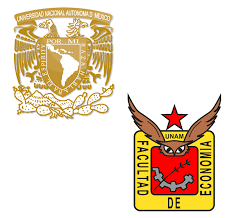

## Introducción a la econometría: Actividad 2

En este trabajo se presenta el análisis inicial de un conjunto de datos sobre ingresos promedio, el cuál se obtiene de: <https://www.cengage.com/cgi-wadsworth/course_products_wp.pl?fid=M20b&product_isbn_issn=9781111531041>.

### El primer paso consiste en la carga de los datos

Para ello utilizamos el comando *load(ruta)* si tenemos el archivo, mediante la librería wooldridge si solo queremos los datos o desde la liga de internet si así lo deseamos, posteriormente podemos visualizar una sección de los datos con el comando *head(data)*:

In [87]:
# @title Esta sección descarga los datos de su ubicación en internet, los descomprime y los guarda en sample_data/datos
download.file("https://academic.cengage.com/resource_uploads/downloads/1111531048_374625.zip",'/content/sample_data/1111531048_374625.zip')
unzip('/content/sample_data/1111531048_374625.zip',exdir = "/content/sample_data/datos")

In [89]:
load('/content/sample_data/datos/R data sets for 5e/wage1.RData')
head(data)

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,⋯,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>
1,3.10,11,2,0,0,1,0,2,1,0,⋯,0,0,0,0,0,0,0,1.131402,4,0
2,3.24,12,22,2,0,1,1,3,1,0,⋯,0,0,1,0,0,0,1,1.175573,484,4
3,3.00,11,2,0,0,0,0,2,0,0,⋯,0,1,0,0,0,0,0,1.098612,4,0
4,6.00,8,44,28,0,0,1,0,1,0,⋯,0,0,0,0,0,1,0,1.791759,1936,784
5,5.30,12,7,2,0,0,1,1,0,0,⋯,0,0,0,0,0,0,0,1.667707,49,4
6,8.75,16,9,8,0,0,1,0,1,0,⋯,0,0,0,1,1,0,0,2.169054,81,64


Para saber a que se refiere cada una de las etiquetas en *data* mandamos llamar al dataset "desc", que viene junto con data en el archivo **wage1**.

A continuación podemos obervar a que se refiere cada parámetro.

In [90]:
desc

variable,label
<fct>,<fct>
wage,average hourly earnings
educ,years of education
exper,years potential experience
tenure,years with current employer
nonwhite,=1 if nonwhite
female,=1 if female
married,=1 if married
numdep,number of dependents
smsa,=1 if live in SMSA


Posteriormente, aunque no es necesario hacerlo de este modo, es conveniente obtener infromación segregada del dataframe original, un subset de variables podría ser:

In [ ]:
sexo<-data$female
educa<-data$educ
salario<-data$wage
sex<-data.frame(Sexo=c("Mujeres","Hombres"),Cantidad=c(sum(sexo),length(sexo)-sum(sexo)))
total<-length(sexo)

## En esta sección se inicia la respuesta a las preguntas



In [91]:
# @title 1. Determine el nivel educativo promedio de la muestra ¿Cuáles son los niveles de educación menor y mayor?
cat(" El nivel educativo promedio es:",mean(educa)," años",
    "\n el nivel educativo menor es:",min(educa)," años",
    "\n y el nivel educativo mayor es:",max(educa)," años")

 El nivel educativo promedio es: 12.56274  años 
 el nivel educativo menor es: 0  años 
 y el nivel educativo mayor es: 18  años

In [92]:
# @title 2. Determine el salario promedio por hora (wage) en la muestra. ¿Parece ser alto o bajo?
mu<-c(mean(salario[data$female==1]),mean(salario[data$female==0]))
cat(" El salario por hora promedio es:",mean(salario)," $/h \n",
    "En el caso de las mujeres se situa en: ",mu[1]," $/h \n",
    "Para los hombre este se situa en: ",mu[2]," $/h \n",
    "Siendo en promedio bajo y mostrando una clara inequidad en salarios por género.")

 El salario por hora promedio es: 5.896103  $/h 
 En el caso de las mujeres se situa en:  4.587659  $/h 
 Para los hombre este se situa en:  7.099489  $/h 
 Siendo en promedio bajo y mostrando una clara inequidad en salarios por género.

In [93]:
# @title 3. ¿Cuántas mujeres hay en la muestra?
cat(" En la muestra hay:",sum(sexo),
    "mujeres, \n representando",round(100*mean(sexo),2),"%")

 En la muestra hay: 252 mujeres, 
 representando 47.91 %

In [94]:
# @title  4. ¿Cuántos hombres hay en la muesta?
cat(" En la muestra hay:",length(sexo)-sum(sexo),
    "hombres, \n representando",round(100*(1-mean(sexo)),2),"%")

 En la muestra hay: 274 hombres, 
 representando 52.09 %

## Finalmente algunas gráficas

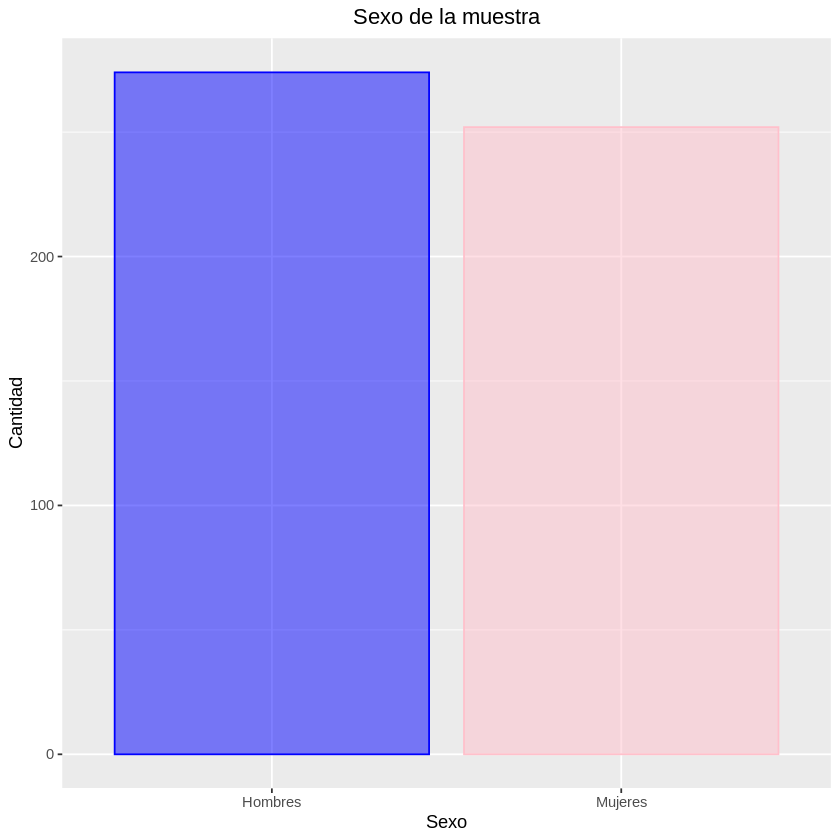

In [ ]:
# @title Gráfica de barras por sexo:
library(ggplot2)
ggplot(sex,aes(x=Sexo,y=Cantidad))+geom_bar(stat="identity",col=c("pink","blue"),fill=c("pink","blue"),alpha=.5)+
  ggtitle("Sexo de la muestra")+
  theme(plot.title = element_text(hjust = 0.5))

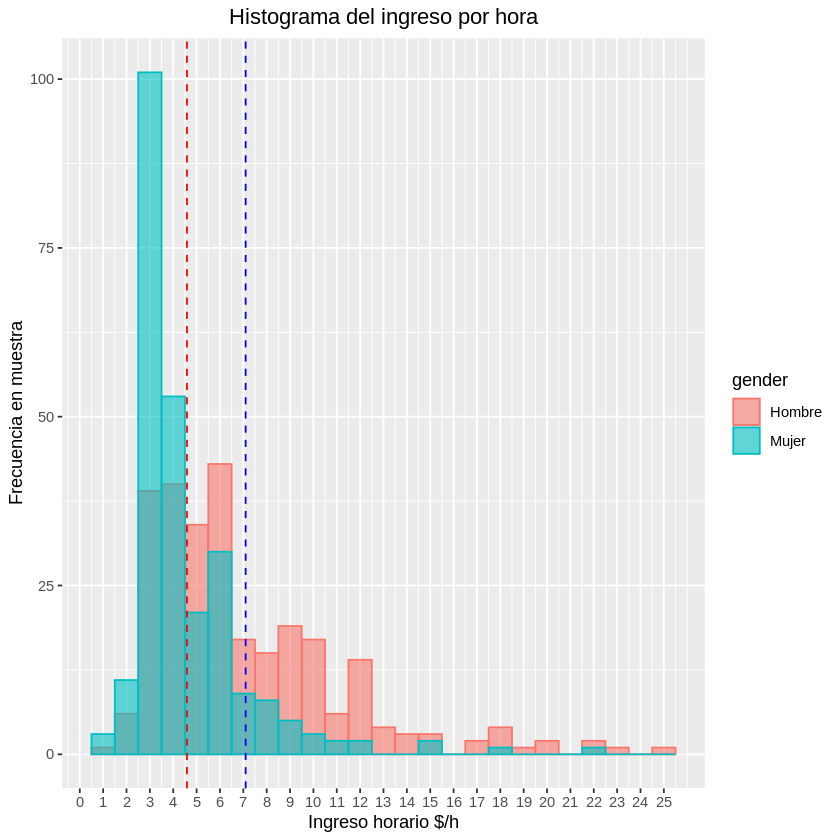

In [48]:
# @title Histograma del ingreso:
datad<-data
datad$gender<-ifelse(data$female==1,"Mujer","Hombre")
ggplot(datad, aes(x=wage, color=gender,fill=gender)) +
  geom_histogram(position="identity",alpha=0.6,binwidth=1)+
  geom_vline(xintercept=mu[1], linetype="dashed",col="red")+
  geom_vline(xintercept=mu[2], linetype="dashed",col="blue")+
   ggtitle("Histograma del ingreso por hora")+
  scale_x_continuous(breaks=seq(0,25,1))+
  xlab("Ingreso horario $/h")+
  ylab("Frecuencia en muestra")+
  theme(plot.title = element_text(hjust = 0.5))